**this is a template notebook for Assignment 2 on Clustering. To get a 60 you will need to complete chapter 1 and 2.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# Tom van der Lans | Gender Prediction
Author: Tom van der Lans<br>
Student number: 631554<br>
Date: 29-05-2022

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* matplotlib
* xgboost
* seaborn
* sklearn

From these we will need the following libraries:

In [348]:
# enter here all those 'from .... import ....'
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd   
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')  

# Xgboost   
try:
    from xgboost import XGBClassifier
    print('xgboost already installed, only imported')
except:
    !pip install xgboost
    from xgboost import XGBClassifier
    print('xgboost was not installed, installed and imported')    

from sklearn.svm import SVC
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
xgboost already installed, only imported


# 1. The Data
We are going to use the datafile "gender_classification_v7.csv". This contains data from "https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset".

In [349]:
# enter the code to load the data
gender_df = pd.read_csv("gender_classification_v7.csv")

Here's a quick look at the data:

In [350]:
# enter the code to see the first few rows of the data
gender_df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


The y variable we are going to look at is the gender column. This column is a boolean value (male or female) this is also what we are gonna predict using the following 2 x variables.
The the x's where we going to look at is the width and the height of the forehead of a person.

*note:* Its easiest if your independent x variables are numeric.

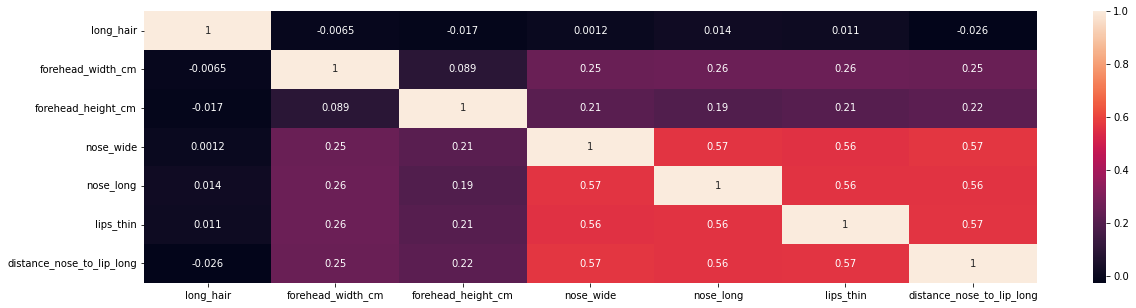

In [351]:
#corelation matrix
corrMatrix = gender_df.corr()
plt.figure(figsize= (20, 5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

The categorical dependent variable gender has the following categories:

In [352]:
# code that returns the different categories in the y variable.
gender_df["gender"] = pd.Categorical(gender_df["gender"])
gender_df["forehead_width_cm"]=pd.Categorical(gender_df["forehead_width_cm"])
gender_df["forehead_height_cm"]=pd.Categorical(gender_df["forehead_height_cm"])

gender_df["gender"].cat.categories

Index(['Female', 'Male'], dtype='object')

We'll also need some training and testing data, so:

In [353]:
# code to split data in training and testing
# X = gender_df[["lips_thin", "nose_long"]]
X = gender_df[["forehead_width_cm", "forehead_height_cm"]]
# y = gender_df["gender"].astype(int)

gender_df["gender"].replace(['Female','Male'], [0,1],inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

All set, lets try to predict this using our independent variables forehead width and forehead height

# 2. The Basic Classification Models

In the Jupyter Notebook from lecture 5 a few different Clustering techniques were discussed. Lets explore how these perform on the data.

Before we look at some 'real' models, its a good idea to get a baseline in by using one or more of the dummy classifiers. Lets see how they perform:

In [354]:
# code to create, fit and measure the dummy classifiers (see chapter 5.4. in the lecture notebook)
# include both the accuracy score and the confusion matrix for each.
def dummy(strategy):
    print(strategy)
    dumMF = DummyClassifier(strategy=strategy)
    dumMF = dumMF.fit(X_train, y_train)
    y_pred = dumMF.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

dummy("most_frequent")
dummy("stratified")
dummy("prior")
dummy("uniform")


most_frequent
0.4947526236881559
[[ 990    0]
 [1011    0]]

stratified
0.5052473763118441
[[503 487]
 [503 508]]

prior
0.4947526236881559
[[ 990    0]
 [1011    0]]

uniform
0.49975012493753124
[[500 490]
 [511 500]]



Here we tested a couple of dummy methods, these dummy methods are like a baseline for the results we are want to reach at least. The classifiers look at the previous results and predicts based on those values.   

So, those are our 'baseline'. A model should be able to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed was the Naive Bayes model. 

**<span style ='background:yellow'>\<explain briefly in your own words how a Naive Bayes method works></span>**

Lets create and fit this model:

In [355]:
# code to create the model, and fit the data.
# Set our model to this GaussianNB
gaussNB = GaussianNB()

#Get the specific fields of interest
gender_dat = gender_df[["forehead_width_cm", "forehead_height_cm", "gender"]]
# remove missing records and draws
gender_dat = gender_dat.dropna()

# Set input and output
X = gender_dat[["forehead_width_cm", "forehead_height_cm"]]
y = gender_dat["gender"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)


#Create the model and prediction
gaussNB.fit(X_train, y_train)
y_pred = gaussNB.predict(X_test)

Now to measure its performance:

In [356]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.6763236763236763
[[365 116]
 [208 312]]


Here we see 2 things printed out that we also see with the dummy classifiers. These are the accuracy score and the confusion matrix. 
The highest accuracy score for the dummy's was 0.49 and here we have 0.67 that is significantly higher so the naive bayes is better than the dummy's.
We can see this back in the confusion matrix.

Lets also have a look at what a prediction would be. If the forehead_width_cm has a score of 14.5 and the forehead_height_cm has a score of 6, then this model will predict: [1] so male

In [357]:
# code to show the prediction
print(gaussNB.predict([[14.5, 6]]))

[1]


c:\Users\Tom\.virtualenvs\project-3dCyqv1I\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.

**<span style ='background:yellow'>\<explain briefly in your own words how a SVM method works></span>**

The basic kernel is the linear one, so we'll attempt that first:

In [358]:
# code to create the model, and fit the data.
# Create the model, then fit the model, and determine the predicted values
svmLin = SVC(kernel='linear')
svmLin.fit(X_train, y_train)
y_pred = svmLin.predict(X_test)

Measuring its performance....

In [359]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.6653346653346653
[[354 127]
 [208 312]]


Again here we see the accuracy score and the confusion matrix (which also can be seen in the naive bayes and the dummy's). The accuracy score here is 0.66, this is a little bit lower than the naive bayes theorem. And again a lot higher then the dummy's. 

Next is the confusion matrix, what we can see here is that the top left and bottom right are the ones that are good so they should be high because here the prediction and the actual are the same. witch in this case is pretty high, but still some wrong predictions.

Lets do the same for the other kernels that were discussed, i.e. rbf, polynomial, and sigmoid.

In [374]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.
def print_accuracy():
    svmLin.fit(X_train, y_train)
    y_pred = svmLin.predict(X_test)

    print(metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

#RBF
print("RBF")
svmLin = SVC(kernel='rbf')
print_accuracy()

#Sigmoid
print("sigmoid")
svmLin = SVC(kernel='sigmoid')
print_accuracy()

#Polynomial
print("polynomial")
svmLin = SVC(kernel='poly')
print_accuracy()


RBF
0.6903096903096904
[[427  54]
 [256 264]]

sigmoid
0.4805194805194805
[[481   0]
 [520   0]]

polynomial
0.6723276723276723
[[380 101]
 [227 293]]



These are the results with the use of different kernels. We can see that there are 2 with a high accuracy score, the RBF with a score of 0.69 (THE HIGHEST YET!) and the polynomial with a score of 0.67. What is interesting is the sigmoid one, this one is really low with a score of 0.48, this is lower than some dummy results which is bad.

Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). 

**<span style ='background:yellow'>\<explain briefly in your own words how a KNN method works></span>**

To use this we need to do some additional steps.

First we need to normalize our x variables:

In [361]:
# use the StandardScaler to normalize the two x variables
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

Text(0, 0.5, 'Error Rate')

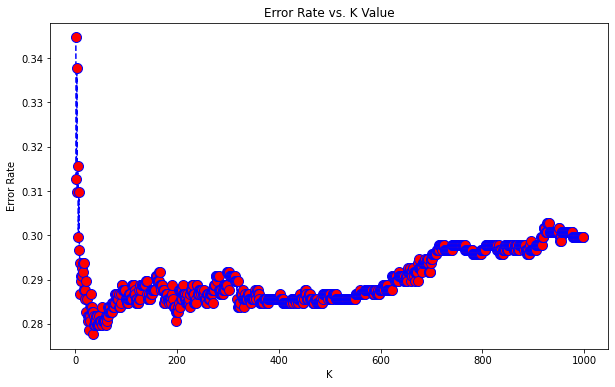

In [362]:
# Code to create the graph with Error Rate vs. K-values.
error_rate=[]
for i in range(1,999):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled, y_train)
    pred_i = knn.predict(X_testScaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,999),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we see the error rate vs. K Value graph, What we want to see is the lowest point or the point where the graph stabilizes. If we look at this graph we can see that we start with a high error rate, after this point the line quickly descends. And what we can see is that the lowest point here (the graph doesn't really stabilize) is around 30.

*Note:* +0.5 if you also use the GridSearch technique to decide on k.

In [363]:
# Uncomment this section if you want to wait for 15 minutes

# # List Hyperparameters that we want to tune.
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# # Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=10)
# #Fit the model
# best_model = clf.fit(X_trainScaled, y_train)
# # Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Now that we know what we want k to be, we can create the model.

In [364]:
# code to create the model with the selected k
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_trainScaled, y_train)
y_pred=knn.predict(X_testScaled)

Lets find out how good it is:

In [365]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7142857142857143
[[462  19]
 [267 253]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, and the SVM kernels?></span>**

One more basic technique to go.

## 2.4. Decision Trees
The last technique that was discussed in detail, were the Decision Trees. 

**<span style ='background:yellow'>\<explain briefly in your own words how a Decision Tree method works></span>**

The following variations were discussed:

* ID3 (or entropy with sklearn)
* Gini
* Random Forest
* Extra trees

Hopefully we have the hang of this now, so lets do each of them in one go:

In [366]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.
print("Entropy")
ent_dtc = DecisionTreeClassifier(criterion = "entropy")
ent_dtc.fit(X_trainScaled,y_train)
y_pred = ent_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print("Gini")
gini_dtc = DecisionTreeClassifier(criterion = "gini")
gini_dtc.fit(X_trainScaled,y_train)
y_pred = gini_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print("Random forest")
rfc = RandomForestClassifier(random_state=0)
rfcModel = rfc.fit(X_trainScaled, y_train)
y_pred = rfcModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print("Extra trees")
# Extremly Random Forest (a.k.a. Extra trees)
erfc = ExtraTreesClassifier(random_state=0)
erfc = erfc.fit(X_trainScaled, y_train)
y_pred = erfc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Entropy
0.6993006993006993
[[415  66]
 [235 285]]

Gini
0.6993006993006993
[[415  66]
 [235 285]]

Random forest
0.7022977022977023
[[405  76]
 [222 298]]

Extra trees
0.6993006993006993
[[415  66]
 [235 285]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, the SVM kernels, and the knn?></span>**

One last set of techniques to explore.

## 2.5. Other Models
In the Jupyter Notebook from the lecture, in chapter 5.4 a few more techniques were simply shown:

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking

Out of curiousity lets see how these perform.

In [367]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.
print("Linear Discriminant Analysis")
lda = LinearDiscriminantAnalysis()
ldaModel=lda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()

print("Quadratic Discriminant Analysis")
qda = QuadraticDiscriminantAnalysis()
qdaModel=qda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()

print("Logistic Regression Classifier")
logreg = LogisticRegression()
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()

print("Multinomial Logistic Regression Classification")
logreg = LogisticRegression(multi_class='multinomial')
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()

print("Adaptive Boosting")
adaBst = AdaBoostClassifier(random_state=0)
adaBst = adaBst.fit(X_trainScaled, y_train)
y_pred = adaBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()

print("Gradient Boosting")
gradBst = GradientBoostingClassifier(random_state=0)
gradBst = gradBst.fit(X_trainScaled, y_train)
y_pred = gradBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()

print("Histogram Gradient Boosting")
histBst = HistGradientBoostingClassifier(random_state=0)
histBst = histBst.fit(X_trainScaled, y_train)
y_pred = histBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()

print("XGBoost")
xgb = XGBClassifier()
xgb.fit(X_trainScaled, y_train)
y_pred = xgb.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()

print("Stacking")
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]

stackCl = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stackCl.fit(X_trainScaled, y_train)
y_pred = stackCl.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print()


Linear Discriminant Analysis
0.6713286713286714

Quadratic Discriminant Analysis
0.6713286713286714

Logistic Regression Classifier
0.6713286713286714

Multinomial Logistic Regression Classification
0.6713286713286714

Adaptive Boosting
0.7152847152847153

Gradient Boosting
0.7172827172827173

Histogram Gradient Boosting
0.7052947052947053

XGBoost
0.6903096903096904

Stacking
0.6873126873126874



**<span style ='background:yellow'>\<which performed best?></span>**

<font size="5"><center>-----Chapters 1 and 2 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 3. Visualisation

With two input parameters we can actually determine visually where a model will classify a variable into which category. An overview of such plots is shown at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

We cannot copy that code since it does a comparison. What we want is a function that takes the X and Y data as input, as well as the model to be used and then shows the decision areas.

In [368]:
# the code for the function


In [369]:
# an example of using the function


# 4. Categorical Input
With classification we have a categorical output variable, but what if we also have one or more categorical input variables.

One popular technique is one-hot-encoding, but there are others.

In this chapter we'll discuss **<span style ='background:yellow'>\<your chosen technique></span>**.

**<span style ='background:yellow'>\<explain the technique in detail. What does it do and how does it work></span>**

In [370]:
# example code of using this technique


# 5. Performance
Some models get higher accuracy scores than others. In the Jupyter Notebook from the lecture the UFC data was used and the QDA had the highest accuracy score: 0.6747. The big question is, can it be done better? First areas to look for improvement are to simply increase the number of input variables, or tweak some parameters of some of the models, or a combination of both.

In this chapter we'll give it an attempt.

First we need to load the data:

In [371]:
# code to load the UFC data


**<span style ='background:yellow'>\<explain your attempt, what did you do.></span>**

In [372]:
# code that will generate an accuracy score for the outcome that is higher than 0.6747


# 6. A New Technique

Many techniques were discussed in class and the lecture Jupyter Notebook, but there are a lot more. In this chapter the \<your chosen new technique> is discussed.

**<span style ='background:yellow'>\<explain in detail this new technique. Note that other students should be able to understand it from your explanation alone!></span>**

In [373]:
# code on using this technique


**<span style ='background:yellow'>\<feel free to use more cells for this, you probably need them></span>**